Name: M. Kutay Yabas

I hereby declare that I observed the honour code of the university when preparing the homework.

<span style="color:blue">*I have done as much as I can. I will complete tomorrow. It took more time than I have expected.  :/*</span>

## Solution to 16.3-5 and 18


### 16.3

$R ∼ 𝒰(0,30)$

I assume that there is a uniform random number generator between 0 and 30 and
the newly generated value is assigned to the new value with a probability of p to
the timeseries, otherwise the most recent value is used. In this example
probably $p\approx0.8$.

$ P(R,x_{k-1}|x_{k}) \varpropto P(x_{k}|R,x_{k-1})P(R)P(x_{k-1})$ (not sure?)

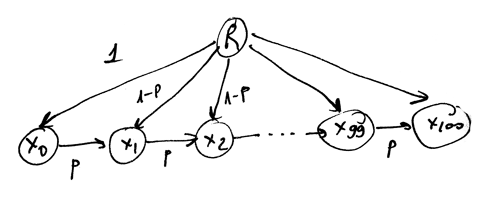

In [1]:
from IPython.display import Image
Image("163.png")

### 16.4
The letters seems to be aligned by a Markov model. The seris increase alphabetically, make no progress or start from the very beginning. It can be modeled as;

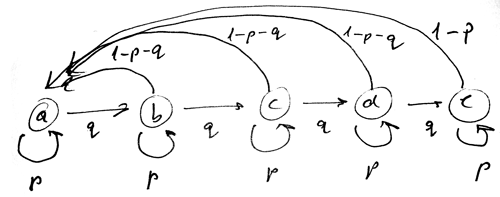

In [2]:
Image("164.png")

### 16.5
I see groups of 3 or 4, zeroes and ones.

$C ∼ 𝒰(3,4)$

$N ∼ 𝒰(0,1)$

N the number 0 or 1, and count C generates the data.

### 18.1

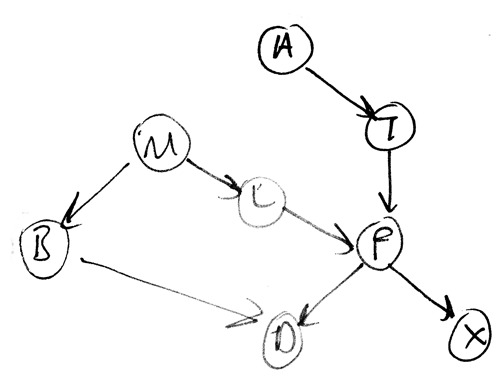

In [3]:
Image("181.png")

### 18.2

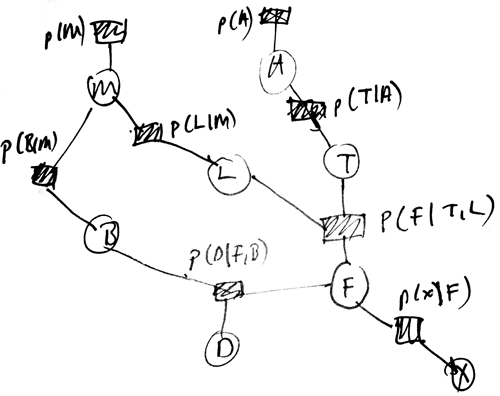

In [4]:
Image("182.png")

## Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [5]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [6]:
import csv
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
# for c,p in zip(alphabet,T[letter2idx['a']]):
#     print(c,p)

Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

### 1

In [7]:
import random

def guess_xk(x0):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(alphabet,  T[letter2idx[x0]]):
        cumulative_probability += float(item_probability)
        if x < cumulative_probability: break
    return item
    # numpy.random.choice have a bug in weights. After trying for some time I have foudn this algorithm from
    # https://www.safaribooksonline.com/library/view/python-cookbook-2nd/0596007973/ch04s22.html

def generate(N=10,x0="."):
    string = x0 # x0
    for i in range(N):
        string = string + guess_xk(string[-1])
    return string

print( generate(100) )
print( generate(20) )
print( generate(30) )
print( generate(5) )

.f.h..ccee.irine.ryorengewiplitht.hi.tizoul.at.thatos.theangee.f..wn.s.ofache.mo.chr.ly.i.ches.tlyegh
.femed.to.posoun.whe.
.bunesuninger.oulangean.apand..
.od.vi


### 2

In [8]:
guess = ""

for i in range(len(test_strings)):
    test_string = [c for c in test_strings[i]]

    for i,c in enumerate( test_string):
        prev = "."
        if i > 0:
            prev = test_string[i-1]

        if c == "_":
            test_string[i] = guess_xk(prev)
            # what about the next char? I should also find a way to implement that.
    print("".join( test_string))
        

thenbrn.n.fox.
iugsttena.tonbe.bnswer.h
ithat..radhong.te.reisg
qud.t.l.wz.h.ivet.hi.br..o..
